<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Delta_forma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro, vamos considerar que $\delta$ é dado por uma lei de potência da forma:

$\delta = A z^{-B}$

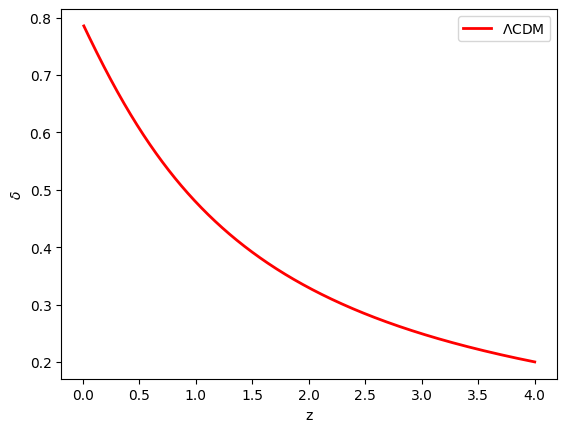

x = 0: y = 0.479
x = 1: y = 0.607
x = 2: y = 0.662
x = 3: y = 0.692
x = 4: y = 0.710
-----------------------------------
x = 0.5: y = 0.559
x = 1.0: y = 0.607
x = 1.5: y = 0.639
x = 2.0: y = 0.662
x = 2.5: y = 0.679
x = 3.0: y = 0.692
x = 3.5: y = 0.702
x = 4.0: y = 0.710
-------------COEFICIENTES--------------------------
a_0 = -3.360443668025976e-06
a_1 = 8.635789252951998e-05
a_2 = -0.0009727060861671863
a_3 = 0.0063183300940028485
a_4 = -0.026130265785074352
a_5 = 0.0711065458504934
a_6 = -0.1235987539849416
a_7 = 0.10827276666214536
a_8 = 0.069613443897809
a_9 = -0.41555037090558183
a_10 = 0.7899034271742268


In [15]:


# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.interpolate import interp1d

# Parâmetros:
H0 = 67.4
O_m0 = 0.315
     

# Modelo LCDM:
def Densidade(t, y):    # t é o fator de escala e y é o delta (contraste)
    D_RG  = y[0]     # contraste
    dD_RG = y[1]    # primeira derivada do contraste

    O_m = O_m0*t**(-3)  
    O_L = 1 - O_m0

    H_RG = H0*np.sqrt(O_m + O_L)    # H(z)
    dH_RG = - (H_RG/t) - 0.5*(H0/t)*(H0/H_RG)*(O_m - 2*O_L)        # derivada do H(z)

# funções definidas somente para facilitar a escrita da derivada segunda do contraste
    faux1 = 3*H0**2
    faux2 = 2*(t**2)*(H_RG**2)

    ddD_RG = - ((3/t) + (dH_RG/H_RG))*dD_RG + (faux1/faux2)*O_m*D_RG   #  eq. da derivada segunda do contraste
    return [dD_RG, ddD_RG]
     

# Espaço de integração:
t_span = [0.2, 0.99]   # intervalo de integração do fator de escala
t = np.linspace(0.2, 0.99, 1000)

# Condições iniciais:
y0 = [0.2, 0.99] 
     

# Solução:
sol = solve_ivp(Densidade, t_span, y0, t_eval=t, method='LSODA') # função que quero resolver, o intervalo de integração, as condições iniciais, o linspace e o método
D_RG = sol.y[0]
dD_RG = sol.y[1]
     

# definindo o redshift
z = 1/sol.t - 1
     

# plotando o contraste x z
#plt.figure(figsize=(10, 8))
plt.plot(z, D_RG, color='red', linewidth = 2, label='$\Lambda$CDM')
plt.legend()
plt.xlabel('z')
plt.ylabel('$\delta$')
#plt.savefig('delta(z).png', dpi=520, format='png', bbox_inches='tight')
plt.show()

# interpolação da solução
D_RG_interp = interp1d(z, D_RG)

# valores de x desejados
x = np.arange(0, 5)

# valores de y correspondentes
y = D_RG_interp(1/(1+x))

# impressão dos valores de y
for i in range(len(y)):
    print(f"x = {i}: y = {y[i]:.3f}")

print('-----------------------------------')

# pegar valores específicos do contraste (que é o y) de acordo com os valores específicos de z (que é o x)
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])

# valores de y correspondentes
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = D_RG_interp(1/(1+x[i]))

# impressão dos valores de y
for i in range(len(y)):
    print(f"x = {x[i]:.1f}: y = {y[i]:.3f}")

print('-------------COEFICIENTES--------------------------')

# regressão polinomial: expansão da curva em série de Taylor
coefficients = np.polyfit(z, D_RG , deg=10)  # deg é o grau do polinômio

for i in range(len(coefficients)):
    print(f"a_{i} = {coefficients[i]}")


Vemos acima que $\delta$ pode ser escrito como um polinômio. Como uma lei de potência pode ser escrita como um polinômio se a expandirmos em série de Taylor, logo $\delta$ pode ser escrito como uma lei de potência.

Sendo:

$log(\delta) = log(A) - B log(z)$,

então log(A) é o coeficiente linear da reta e B é o seu coeficiente angular.

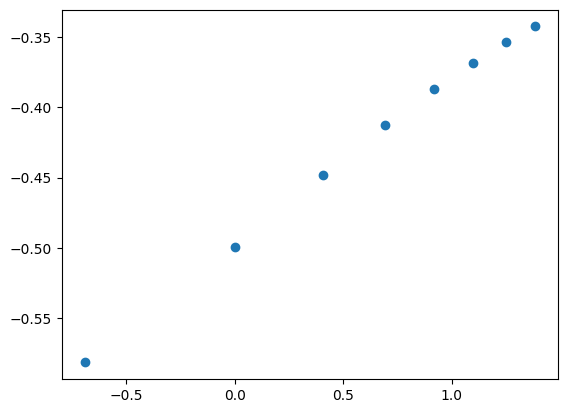

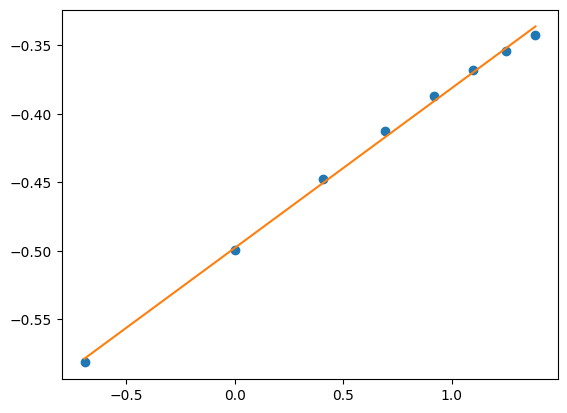

Os valores da equação da reta ajuste para cada x serão: [-0.57875743 -0.49788586 -0.45057903 -0.41701429 -0.39097946 -0.36970746
 -0.35172224 -0.33614273]
O coeficiente angular da reta de ajuste é: 0.11667301007975817
O coeficiente linear da reta de ajuste é: -0.4978858621975545


In [16]:
# gráfico log(delta) x log(z)

x_1 = np.array([0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4]) # valores do redshift
y_1 = np.array([0.559, 0.607, 0.639, 0.662, 0.679, 0.692, 0.702, 0.710]) # valores de delta

plt.scatter(np.log(x_1), np.log(y_1))
plt.show()

a = np.log(x_1)
b = np.log(y_1)

#Aqui está o cálculo da sua linha de ajuste:
slope, intercept = np.polyfit (a, b, 1)  #(o 1 no final indica a escala do seu gráfico, as proporções de x e y comparadas)

# Abaixo, vamos indicar os comandos para a "plotagem" do gráfico:
plt.plot(a, b, 'o')
plt.plot(a, slope*a + intercept)

#Observe que a equação da linha de ajuste é f(x) = slope*x + intercept. 
# 'slope' é o coeficiente angular da reta de ajuste e 'intercept', o coeficiente linear. 
#Você pode substituir seus próprios dados nessa equação para calcular a linha de ajuste para seus próprios dados.

# O comando abaixo será para a exibição do gráfico:
plt.show()

print('Os valores da equação da reta ajuste para cada x serão:',slope*a + intercept) # Fará aparecer os valores de f(x) da equação de ajuste linear 

print('O coeficiente angular da reta de ajuste é:', slope)

print('O coeficiente linear da reta de ajuste é:', intercept)

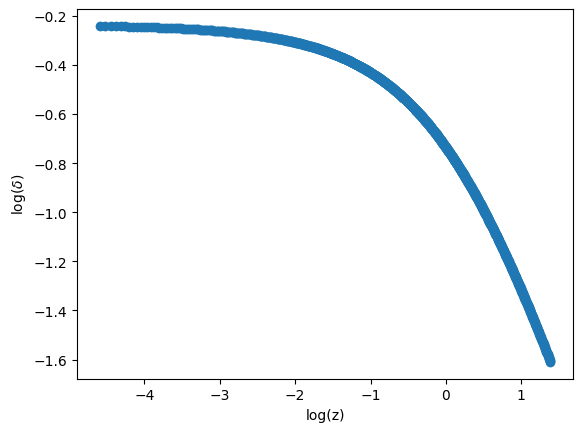

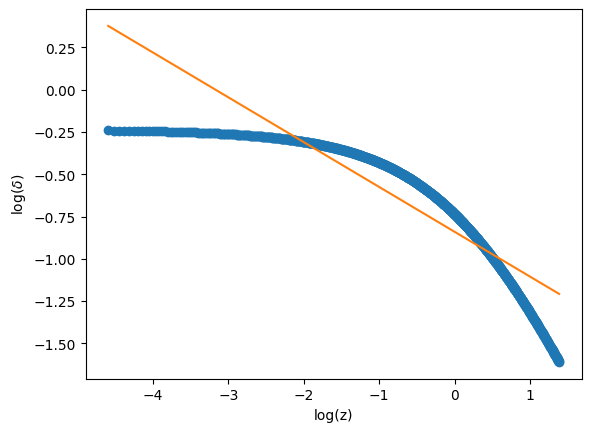

O coeficiente angular da reta de ajuste é: -0.2648511377215502
O coeficiente linear da reta de ajuste é: -0.8400935410326135


In [17]:
plt.scatter(np.log(z), np.log(D_RG))
plt.xlabel('log(z)')
plt.ylabel('log($\delta$)')
plt.show()

a = np.log(z)
b = np.log(D_RG)

#Aqui está o cálculo da sua linha de ajuste:
slope, intercept = np.polyfit (a, b, 1)  #(o 1 no final indica a escala do seu gráfico, as proporções de x e y comparadas)

# Abaixo, vamos indicar os comandos para a "plotagem" do gráfico:
plt.plot(a, b, 'o')
plt.plot(a, slope*a + intercept)
plt.xlabel('log(z)')
plt.ylabel('log($\delta$)')
plt.show()

#print('Os valores da equação da reta ajuste para cada x serão:',slope*a + intercept) # Fará aparecer os valores de f(x) da equação de ajuste linear 

print('O coeficiente angular da reta de ajuste é:', slope)

print('O coeficiente linear da reta de ajuste é:', intercept)

Porém, temos um problema. O código no retorna que, quando z = 4, o valor do contraste é 0.710, o que não corresponde ao que vemos no gráfico de $\delta$ x $z$.


Consideremos agora que $\delta$ é dado por uma exponencial:

$\delta = \alpha e^{-\beta z}$.

Logo:

$log (\delta) = log(\alpha) - \beta z$.

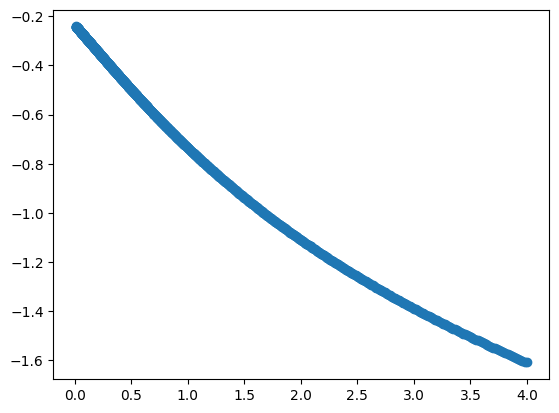

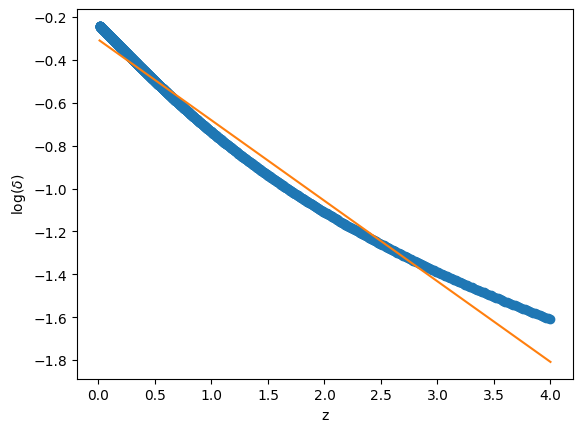

O coeficiente angular da reta de ajuste é: -0.3758766071850533
O coeficiente linear da reta de ajuste é: -0.305358271720278


In [18]:
plt.scatter(z, np.log(D_RG))
plt.show()

a = z
b = np.log(D_RG)

#Aqui está o cálculo da sua linha de ajuste:
slope, intercept = np.polyfit (a, b, 1)  #(o 1 no final indica a escala do seu gráfico, as proporções de x e y comparadas)

# Abaixo, vamos indicar os comandos para a "plotagem" do gráfico:
plt.plot(a, b, 'o')
plt.plot(a, slope*a + intercept)
plt.xlabel('z')
plt.ylabel('log($\delta$)')
plt.show()

#print('Os valores da equação da reta ajuste para cada x serão:',slope*a + intercept) # Fará aparecer os valores de f(x) da equação de ajuste linear 

print('O coeficiente angular da reta de ajuste é:', slope)

print('O coeficiente linear da reta de ajuste é:', intercept)